In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# In this tutorial, we will be training a lot of models. In order to use GPU memory cautiously,
# we will set tensorflow option to grow GPU memory allocation when required.
#physical_devices = tf.config.list_physical_devices('GPU') 
#if len(physical_devices)>0:
 #   tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [2]:
"""class NeuralNetwork(tf.keras.Model):
  def __init__(self):
    super(NeuralNetwork, self).__init__()
    self.sequence = keras.Sequential([
      keras.layers.Input(shape=(29,)),
      keras.layers.Dense(20, activation='relu'),
      keras.layers.Dense(3, activation = "softmax")
    ])

  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime"""

'class NeuralNetwork(tf.keras.Model):\n  def __init__(self):\n    super(NeuralNetwork, self).__init__()\n    self.sequence = keras.Sequential([\n      keras.layers.Input(shape=(29,)),\n      keras.layers.Dense(20, activation=\'relu\'),\n      keras.layers.Dense(3, activation = "softmax")\n    ])\n\n  def call(self, x: tf.Tensor) -> tf.Tensor:\n    y_prime = self.sequence(x)\n    return y_prime'

In [3]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self, batch_size,hidden_layers_sizes,activation_fn):
    super(NeuralNetwork, self).__init__()
    self.sequence = keras.models.Sequential()
    self.sequence.add(keras.layers.Input(shape=(29,)))#, batch_size=batch_size))
    for i in hidden_layers_sizes:
        self.sequence.add(tf.keras.layers.Dense(i, activation=activation_fn))
    self.sequence.add(tf.keras.layers.Dense(3))
  def call(self, x: tf.Tensor) -> tf.Tensor:
    y_prime = self.sequence(x)
    return y_prime

In [4]:
model = NeuralNetwork(32,[20,20],"relu")

In [5]:
model.build((1,29))

In [6]:
model.summary()

Model: "neural_network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 3)                 1083      
                                                                 
Total params: 1,083
Trainable params: 1,083
Non-trainable params: 0
_________________________________________________________________


In [7]:
"""model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(29,)))
model.add(keras.layers.Dense(20, activation='relu'))
model.add(keras.layers.Dense(3, activation = "softmax"))
model.summary()"""

'model = keras.models.Sequential()\nmodel.add(keras.layers.Input(shape=(29,)))\nmodel.add(keras.layers.Dense(20, activation=\'relu\'))\nmodel.add(keras.layers.Dense(3, activation = "softmax"))\nmodel.summary()'

In [8]:
def get_data( dataframe): #-> Tuple[tf.data.Dataset, tf.data.Dataset]:
  image_size = 28
  num_train = 770
  num_test = 194
  
  training_data, testing_data = train_test_split(dataframe, test_size=0.2, random_state=25)
  training_data = training_data.to_numpy()
  testing_data = testing_data.to_numpy()

  return (training_data, testing_data)

In [9]:
dataframe = pd.read_csv("data/data_set_prepared.csv")
x = dataframe.iloc[:,:29]

In [10]:
y= dataframe.iloc[:,29:]

In [11]:
x_training, x_test = get_data(x)
y_training, y_test = get_data(y)

In [12]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="sgd",metrics=['acc'])#,'val_loss','val_acc'])

In [13]:
hist = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=1000)

Epoch 1/1000
25/25 [==============================] - 1s 12ms/step - loss: 1.1287 - acc: 0.4981 - val_loss: 1.1015 - val_acc: 0.4663
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0477 - acc: 0.5214 - val_loss: 1.0509 - val_acc: 0.4819
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 1.0004 - acc: 0.5253 - val_loss: 1.0210 - val_acc: 0.4819
Epoch 4/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.9687 - acc: 0.5370 - val_loss: 0.9992 - val_acc: 0.4870
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.9439 - acc: 0.5447 - val_loss: 0.9814 - val_acc: 0.5181
Epoch 6/1000
25/25 [==============================] - 0s 6ms/step - loss: 0.9229 - acc: 0.5616 - val_loss: 0.9689 - val_acc: 0.5233
Epoch 7/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.9067 - acc: 0.5837 - val_loss: 0.9614 - val_acc: 0.5233
Epoch 8/1000
25/25 [==============================] - 0s 4ms/step - loss: 0

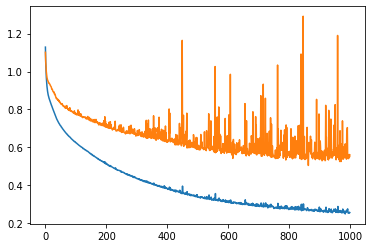

In [14]:
for x in ['loss','val_loss']:
    plt.plot(hist.history[x],label=f"Historic vers ")

In [15]:
def graph_loss_vs_epochs(history):#, save_image_filename, title):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss'] #[10 9 8 5 6 7] 3

    # Create count of the number of epochs
    epoch_count = range(1, len(training_loss) + 1) #[1 2 3 4 5 6]

    # Visualize loss history
    plt.title("title")
    plt.plot(epoch_count, training_loss, 'r--')
    plt.plot(epoch_count, test_loss, 'b-')
    plt.legend(['Training Loss', 'Test Loss'])
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    #plt.savefig(save_image_filename) 
    plt.axvline(x = epoch_count[test_loss.index(min(test_loss))], color = 'c', linestyle="dotted")
    plt.show()

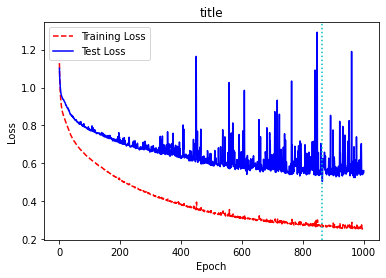

In [16]:
graph_loss_vs_epochs(hist)

In [19]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.Adam(learning_rate=0.1),metrics=['acc'])#,'val_loss','val_acc'])

In [20]:
hist2 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=1000)
graph_loss_vs_epochs(hist2)

Epoch 1/1000
25/25 [==============================] - 1s 9ms/step - loss: 1.7106 - acc: 0.4682 - val_loss: 0.9311 - val_acc: 0.5440
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.8032 - acc: 0.6446 - val_loss: 0.8678 - val_acc: 0.6321
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6984 - acc: 0.7095 - val_loss: 0.8773 - val_acc: 0.5959
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.7010 - acc: 0.7043 - val_loss: 0.8632 - val_acc: 0.5699
Epoch 5/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.7611 - acc: 0.6524 - val_loss: 0.8453 - val_acc: 0.5699
Epoch 6/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6785 - acc: 0.7069 - val_loss: 0.7948 - val_acc: 0.6166
Epoch 7/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6305 - acc: 0.7328 - val_loss: 0.7888 - val_acc: 0.6269
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.

KeyboardInterrupt: 

In [21]:
model.compile(loss=keras.losses.CategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.SGD(learning_rate=0.001),metrics=['acc'])#,'val_loss','val_acc'])
hist3 = model.fit(x_training,y_training,validation_data=(x_test,y_test),epochs=1000)
graph_loss_vs_epochs(hist3)

Epoch 1/1000
25/25 [==============================] - 1s 10ms/step - loss: 0.6409 - acc: 0.7432 - val_loss: 0.7591 - val_acc: 0.6891
Epoch 2/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6333 - acc: 0.7432 - val_loss: 0.7633 - val_acc: 0.6891
Epoch 3/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6324 - acc: 0.7432 - val_loss: 0.7585 - val_acc: 0.6891
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6327 - acc: 0.7432 - val_loss: 0.7610 - val_acc: 0.6891
Epoch 5/1000
25/25 [==============================] - 0s 4ms/step - loss: 0.6309 - acc: 0.7432 - val_loss: 0.7577 - val_acc: 0.6891
Epoch 6/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6331 - acc: 0.7432 - val_loss: 0.7579 - val_acc: 0.6891
Epoch 7/1000
25/25 [==============================] - 0s 5ms/step - loss: 0.6309 - acc: 0.7432 - val_loss: 0.7631 - val_acc: 0.6891
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0

KeyboardInterrupt: 